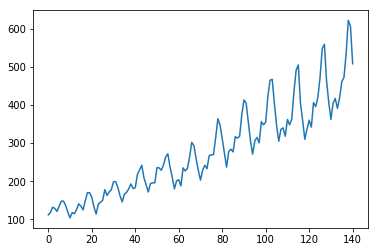

series length: 139
train score: 0.8513960796729187
test score: 0.7416450359139077
series length: 138
train score: 0.8462409194059443
test score: 0.7569414105609157
series length: 137
train score: 0.8461051155725685
test score: 0.7628857373086682
series length: 136
train score: 0.851950222975051
test score: 0.7684636544185165
series length: 135
train score: 0.849816813398563
test score: 0.7717649557506762
series length: 134
train score: 0.8502460006352721
test score: 0.7685707757748498


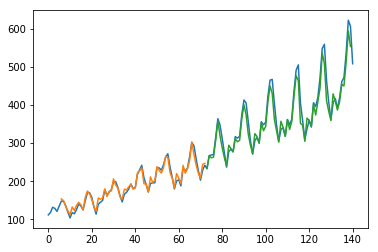

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# we need to skip the 3 footer rows
# skipfooter does not work with the default engine, 'c'
# so we need to explicitly set it to 'python'
df = pd.read_csv('C:\\Users\\avish\\Documents\\Machin_ Learning_and_Python\\CSV_Files\\international-airline-passengers.csv', engine='python', skipfooter=3)

# rename the columns because they are ridiculous
df.columns = ['month', 'num_passengers']

# plot the data so we know what it looks like
plt.plot(df.num_passengers)
plt.show()

# let's try with only the time series itself
series = df.num_passengers.values

# let's see if we can use D past values to predict the next value
N = len(series)
for D in (2,3,4,5,6,7):
    n = N - D
    X = np.zeros((n, D))
    for d in range(D):
        X[:,d] = series[d:d+n]
#         print(X)
    Y = series[D:D+n]

    print ("series length:", n)
    Xtrain = X[:n//2]
    Ytrain = Y[:n//2]
    Xtest = X[n//2:]
    Ytest = Y[n//2:]

    model = LinearRegression()
    model.fit(Xtrain, Ytrain)
    print("train score:",model.score(Xtrain, Ytrain))
    
    print ("test score:",model.score(Xtest, Ytest))
    

plt.plot(series)
train_series = np.empty(n)
train_series[:n//2] = model.predict(Xtrain) 
train_series[n//2:] = np.nan
# prepend d nan's since the train series is only of size N - D
plt.plot(np.concatenate([np.full(d, np.nan), train_series]))

test_series = np.empty(n)
test_series[:n//2] = np.nan
test_series[n//2:] = model.predict(Xtest)
plt.plot(np.concatenate([np.full(d, np.nan), test_series]))
plt.show()